Analysis of Super Store Data

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Read the dataset
df = pd.read_csv(r"Super_Store_Data.csv")
#--clean the dataset--
# Remove duplicates
df=df.drop_duplicates()



In [3]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
# Replace numeric nulls with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Replace categorical nulls with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

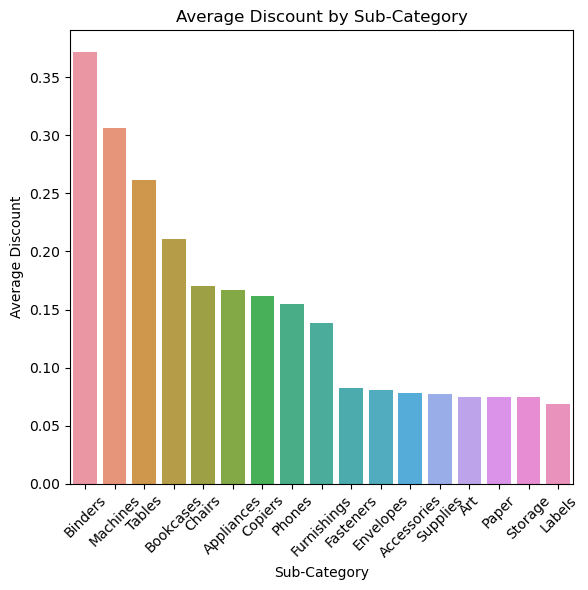

In [4]:
#Visualising Average Discount by Sub-Category using bar plot
plt.figure(figsize=(6, 6))
subdiscount=df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)
sns.barplot(x=subdiscount.index,y=subdiscount.values)
plt.title('Average Discount by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


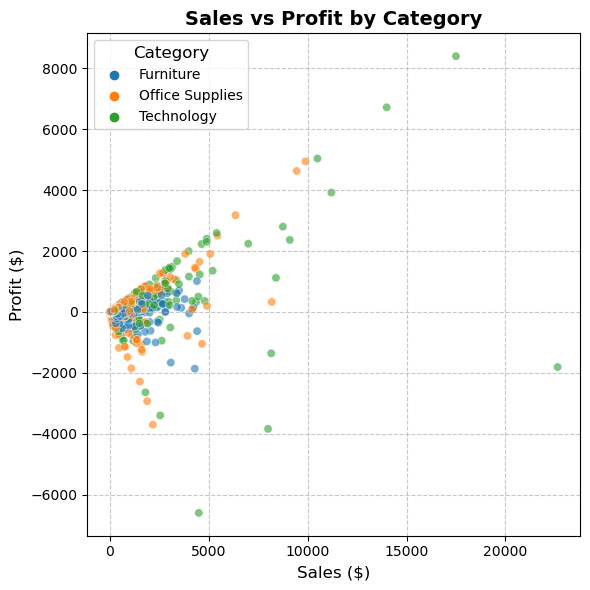

In [5]:

#Visualising  Sales vs Profit with Category coloring using a scatter plot 
if 'Order Date' in df.columns:
    df['Order Date']=pd.to_datetime(df['Order Date'])
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Category',alpha=0.6)
plt.title('Sales vs Profit by Category',fontsize=14,fontweight='bold')
plt.xlabel('Sales ($)',fontsize=12)
plt.ylabel('Profit ($)',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category',title_fontsize=12)
plt.tight_layout()
plt.show()

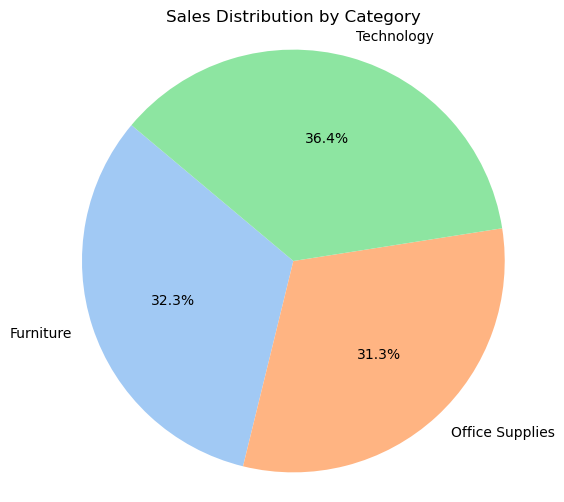

In [6]:
#Visualising Sales Distribution by Category using pie chart
category_sales=df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(category_sales,labels=category_sales.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.axis('equal') 
plt.show()

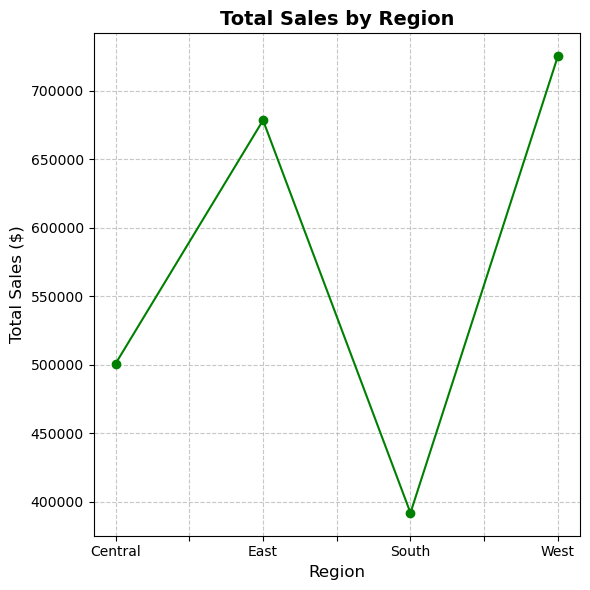

In [7]:
#Visualising Total Sales by Region using line graph
region_sales=df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(6,6))
region_sales.plot(kind='line',marker='o',linestyle='-',color='g')
plt.title('Total Sales by Region',fontsize=14,fontweight='bold')
plt.xlabel('Region',fontsize=12)
plt.ylabel('Total Sales ($)',fontsize=12)
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()


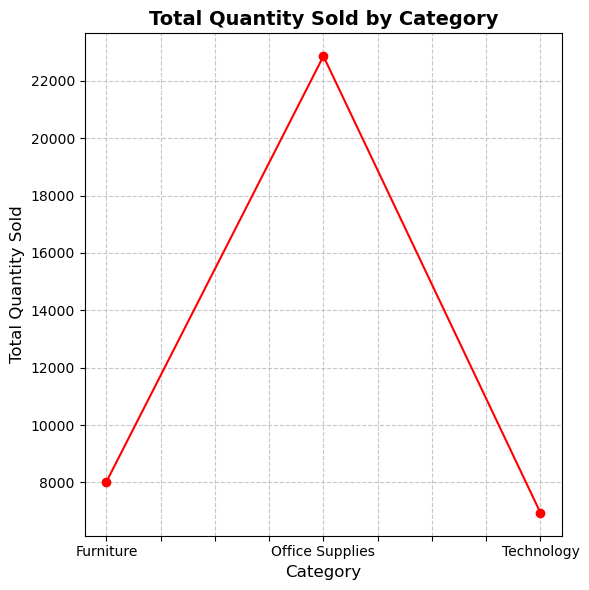

In [9]:
# Group by 'Category' and sum the 'Quantity'
category_quantity = df.groupby('Category')['Quantity'].sum()

# Plot a line graph for quantity by category
plt.figure(figsize=(6,6))
category_quantity.plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Total Quantity Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

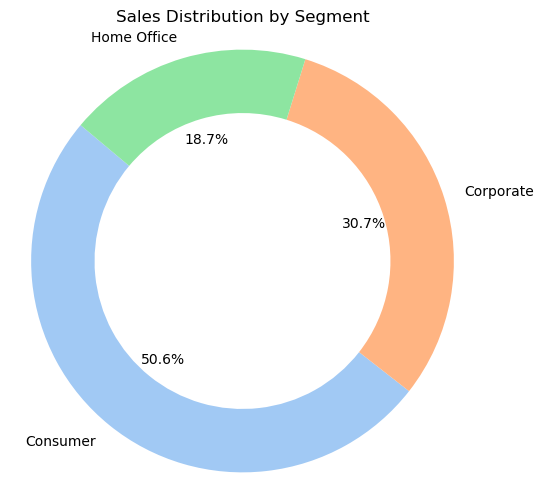

In [10]:
# Group data by 'Segment' and sum the 'Sales'
segment_sales = df.groupby('Segment')['Sales'].sum()

# Plot a donut chart
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Sales Distribution by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()